In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
import pyccl as ccl
import theano
import theano.tensor as tt
import os
import utils
from make_data import MakeData
from scipy.linalg import block_diag
theano.config.exception_verbosity='high'
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Settings

In [2]:
z_max = 1110
res = 200
x_arr = np.linspace(0, np.log(1+z_max), res)
dx = np.mean(np.diff(x_arr))
z_arr = np.exp(x_arr)-1
a_arr = 1./(1+z_arr)

path = '/home/jaimerz/PhD/Growz/data/products'

data_class = MakeData(z_max, res , path)
Planck = data_class.Planck
z_planck = data_class.z_planck
c = data_class.c

DESI = data_class.get_DESI(new=True, mode=None)
H_DESI = data_class.get_DESI(new=True, mode='H')
dA_DESI = data_class.get_DESI(new=True, mode='dA')
fs8_DESI = data_class.get_DESI(new=True, mode='fs8')
WFIRST = data_class.get_WFIRST(new=True)
CC = data_class.get_CC(new=True)
DSS = data_class.get_DSS(new=True)
BOSS = data_class.get_BOSS(new=True)
eBOSS = data_class.get_eBOSS(new=True)
Wigglez = data_class.get_Wigglez(new=True)
DS17 = data_class.get_DS17(new=True)
CMB = data_class.get_CMB(new=True)
FCMB = data_class.get_FCMB(new=True)

In [3]:
n_samples = 100
n_tune = 100
datadict = {'DESI': DESI,
            'H_DESI': H_DESI,
            'dA_DESI': dA_DESI,
            'fs8_DESI': fs8_DESI,
            'WFIRST': WFIRST,
            'CC': CC,
            'DS17': DS17, 
            'BOSS': BOSS,
            'eBOSS': eBOSS,
            'Wigglez': Wigglez,
            'DSS': DSS,
            'CMB': CMB, 
            'FCMB': FCMB}
data_comb = None # All, All_CMB, SDSS, SDSS_CMB, Add, Add_CMB
data_combs = {'All': ['CC', 'DS17', 'BOSS', 'eBOSS', 'Wigglez', 'DSS'],
             'All_CMB': ['CC', 'DS17', 'BOSS', 'eBOSS', 'Wigglez', 'DSS', 'CMB'],
             'SDSS': ['BOSS', 'eBOSS'],
             'SDSS_CMB': ['BOSS', 'eBOSS', 'CMB'],
             'Add': ['CC', 'DS17', 'Wigglez', 'DSS'],
             'Add_CMB': ['CC', 'DS17', 'Wigglez', 'DSS', 'CMB']}

datasets = data_combs[data_comb]

need_dM = ['DESI', 'dA_DESI', 'BOSS', 'eBOSS', 'Wigglez', 'DS17']
need_fs8 = ['DESI', 'fs8_DESI', 'BOSS', 'eBOSS', 'Wigglez', 'DSS']
need_rd = ['BOSS', 'eBOSS', 'CMB']

if any(dataset in datasets for dataset in need_dM):
    get_dM=True 
else:
    get_dM=False
    
if any(dataset in datasets for dataset in need_fs8):
    get_fs8=True
else:
    get_fs8=False
    
if any(dataset in datasets for dataset in need_rd):
    get_rd = True
else:
    get_rd = False

# Plotting

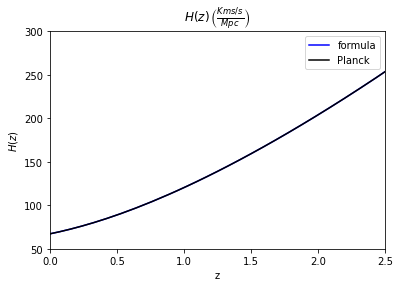

In [4]:
plt.plot(z_arr, data_class.H_arr, "b", label='formula')
plt.plot(z_planck, Planck['Hkms_arr'], "k", label='Planck')


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

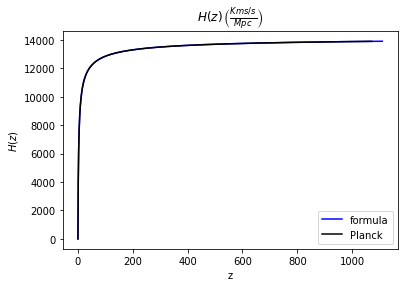

In [5]:
plt.plot(z_arr, data_class.dM_arr, "b", label='formula')
plt.plot(z_planck, Planck['dM_arr'], "k", label='Planck')

# axis labels and title
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

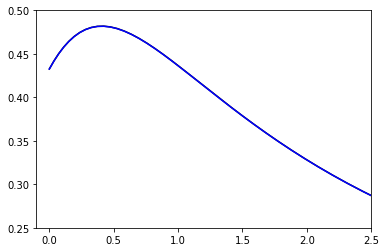

In [6]:
plt.plot(z_planck, Planck['fs8_arr'], "k", label='Planck')
plt.plot(z_planck, data_class.fs8_arr[:-1], "b", label='formula')
plt.xlim(-0.1, 2.5)
plt.ylim(0.25, 0.5)
plt.show()

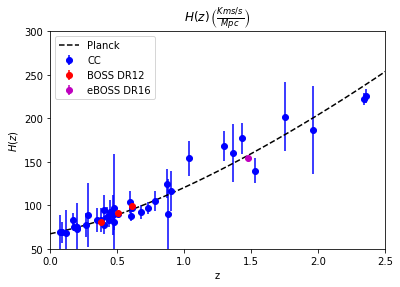

In [7]:
plt.plot(z_planck, Planck['Hkms_arr'], "k--", label='Planck')
plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
#plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS DR16')


# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_data.pdf')  

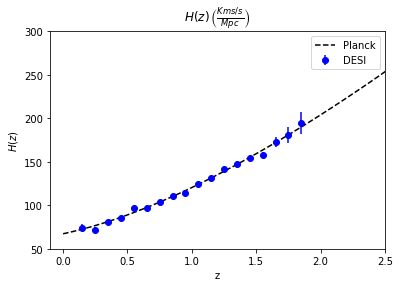

In [8]:
plt.plot(z_planck, Planck['Hkms_arr'], "k--", label='Planck')
plt.errorbar(H_DESI['z'], H_DESI['data'], yerr = H_DESI['err'], fmt='bo', label='DESI')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel(r"$H(z)$")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/H_forecast.pdf')  

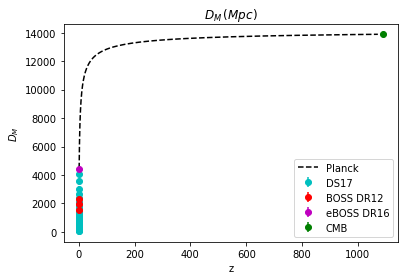

In [9]:
plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.2)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS DR16')
plt.errorbar(CMB['z'], (1/CMB['data'])*(100*CMB['rd']), yerr=(1/CMB['err'])*1/(100*CMB['rd']), fmt='go', label='CMB')

plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_data.pdf')  

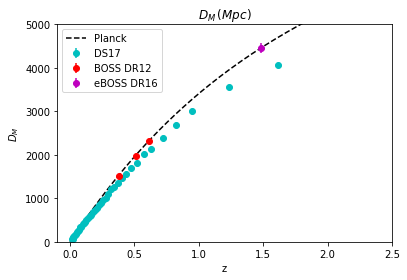

In [10]:
plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.2)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS DR16')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0, 5000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_data.pdf')  

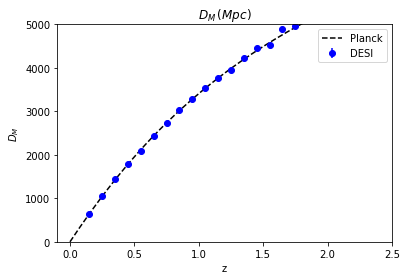

In [11]:
plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], (1+DESI['z'])*dA_DESI['data'], yerr=dA_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0, 5000)
plt.xlabel("z")
plt.ylabel(r"$D_M$")
plt.title(r"$D_M \, (Mpc)$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/DM_forecast.pdf')  

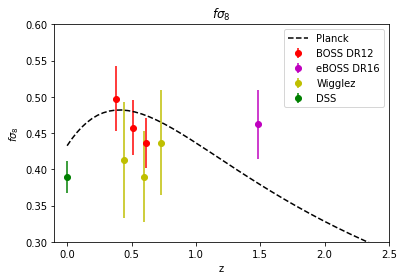

In [12]:
plt.plot(z_planck, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
plt.errorbar(BOSS['z'], BOSS['fs8_data'], yerr=BOSS['fs8_err'], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS['z'], eBOSS['fs8_data'], yerr=eBOSS['fs8_err'], fmt='mo', label='eBOSS DR16')
plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez['err'], fmt='yo', label='Wigglez')
plt.errorbar(DSS['z'], DSS['data'], yerr=DSS['err'], fmt='go', label='DSS')


# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0.3, 0.6)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();

os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_data.pdf')  

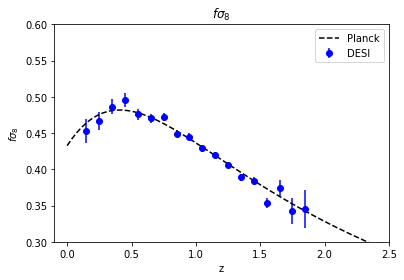

In [13]:
plt.plot(z_planck, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
plt.errorbar(DESI['z'], fs8_DESI['data'], yerr=fs8_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(-0.1, 2.5)
plt.ylim(0.3, 0.6)
plt.xlabel("z")
plt.ylabel(r"$f \sigma_8$")
plt.title(r"$f \sigma_8$")
plt.legend();
os.remove('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf')
plt.savefig('/mnt/c/Users/Jaime/Desktop/PhD/gp_figures/fs8_forecast.pdf')  

In [14]:
data = np.array([])
data_cov = np.array([])
for dataset_name in datasets:
    dataset = datadict[dataset_name]
    data = np.concatenate([data, dataset['data']])
    data_cov = block_diag(data_cov, dataset['cov'])
data_cov = data_cov[1:]

In [15]:
with pm.Model() as model:
    #ℓ = pm.InverseGamma("ℓ", alpha=1, beta=2) 
    ℓ = pm.Uniform("ℓ", 0.001, 7) 
    η = pm.HalfNormal("η", sigma=0.1) 
    #wm0 = data_class.wm0
    #wL0 = data_class.wL0
    wm0 = pm.Uniform("wm0", 0., 0.45)
    wr0 = data_class.wr0
    gp_cov = η ** 2 * pm.gp.cov.ExpQuad(1, ℓ) + pm.gp.cov.WhiteNoise(1e-3)
    gp = pm.gp.Latent(cov_func=gp_cov)
    
    #Mean of the gp
    H = pm.Deterministic('H', 100*tt.sqrt(data_class.wm0*(1+z_arr)**3+wr0*(1+z_arr)**4+data_class.wL0))
    
    #Set up Gaussian process
    DH_gp = gp.prior("DH_gp", X=x_arr[:, None]) 
    H_gp = pm.Deterministic("H_gp", tt.as_tensor_variable(H*(1+DH_gp)))
    H0_gp = pm.Deterministic("H0_gp", tt.as_tensor_variable(H_gp[0]))
    
    if get_dM:
        dH_gp = pm.Deterministic("dH", tt.as_tensor_variable((c/1000)/H_gp))
        dM_rec_gp = tt.zeros(len(z_arr)+1)
        dM_rec_gp = tt.inc_subtensor(dM_rec_gp[1:],
                  tt.as_tensor_variable(dx*tt.cumsum(dH_gp*(1+z_arr))))
        dM_trap_gp = tt.as_tensor_variable(0.5*(dM_rec_gp[1:]+dM_rec_gp[:-1])-0.5*dM_rec_gp[1])
        dM_gp = pm.Deterministic('dM_gp', dM_trap_gp)
        #dM_gp = pm.Deterministic('dM_gp', dM_rec_gp[:-1])
        dA_gp = pm.Deterministic('dA_gp', dM_gp/(1+z_arr))
        dL_gp = pm.Deterministic('dL_gp', dM_gp*(1+z_arr))
        
    if get_rd:
        #https://arxiv.org/pdf/2106.00428.pdf
        #wb0 = data_class.wb0
        wb0 =  pm.Uniform("wb0", 0.022, 0.023)
        a1 = 0.00785436
        a2 = 0.177084
        a3 = 0.00912388
        a4 = 0.618711
        a5 = 11.9611
        a6 = 2.81343
        a7 = 0.784719
        rd_gp = tt.as_tensor_variable(1/(a1*wb0**a2+a3*wm0**a4+a5*wb0**a6*wm0**a7))  
        
    if get_fs8:
        #s80 = data_class.s80
        s80 = pm.Normal("s80", 0.8, 0.5)
        E = H_gp/H_gp[0]
        Om = wm0*(100/H[0])**2
        xx = x_arr[::-1]
        ee = E[::-1]
        aa = np.exp(-xx)
        dx = np.mean(np.diff(xx))

        nz = len(aa)
        dd = tt.zeros(nz)
        yy = tt.zeros(nz)
        dd = tt.inc_subtensor(dd[0], aa[0])
        yy = tt.inc_subtensor(yy[0], aa[0]**3*E[0])

        for i in range(nz-1):
            A0 = -1.5*Om/(aa[i]*ee[i])
            B0 = -1./(aa[i]**2*ee[i])
            A1 = -1.5*Om/(aa[i+1]*ee[i+1])
            B1 = -1./(aa[i+1]**2*ee[i+1])
            yy = tt.inc_subtensor(yy[i+1], (1+0.5*dx**2*A0*B0)*yy[i]+0.5*(A0+A1)*dx*dd[i])
            dd = tt.inc_subtensor(dd[i+1],0.5*(B0+B1)*dx*yy[i]+(1+0.5*dx**2*A0*B0)*dd[i])
        
        y = tt.as_tensor_variable(yy[::-1])
        d = tt.as_tensor_variable(dd[::-1])
        
        fs8_gp = pm.Deterministic('fs8_gp', s80*y/(a_arr**2*E*d[0]))
        s8_gp = pm.Deterministic('s8_gp', s80*d/d[0])
    
    theory = tt.as_tensor_variable([])

In [16]:
if 'DESI' in datasets:
    print('Adding DESI')
    with model:
        DESI_H = pm.Deterministic('DESI_H',
                 tt.as_tensor_variable(H_gp[DESI['idx']]+(H_gp[DESI['idx']+1]-H_gp[DESI['idx']])*DESI['U']))
        DESI_dA = pm.Deterministic('DESI_dA',
                  tt.as_tensor_variable(dA_gp[DESI['idx']]+(dA_gp[DESI['idx']+1]-dA_gp[DESI['idx']])*DESI['U']))
        DESI_fs8 = pm.Deterministic('DESI_fs8',
                   tt.as_tensor_variable(fs8_gp[DESI['idx']]+(fs8_gp[DESI['idx']+1]-fs8_gp[DESI['idx']])*DESI['U']))
        theory = tt.concatenate([theory, DESI_H, DESI_dA, DESI_fs8])
        
if 'WFIRST' in datasets:
    print('Adding WFIRST')
    with model:
        WFIRST_E = pm.Deterministic('WFIRST_E',
                   tt.as_tensor_variable(E_gp[WFIRST['idx']]+(E_gp[WFIRST['idx']+1]-E_gp[WFIRST['idx']])*WFIRST['U']))
        theory = tt.concatenate([theory, WFIRST_E])

if 'CC' in datasets:
    print('Adding CCs')
    with model:
        CC_H = pm.Deterministic("CC_H",
               tt.as_tensor_variable(H_gp[CC['idx']]+(H_gp[CC['idx']+1]-H_gp[CC['idx']])*CC['U']))
        theory = tt.concatenate([theory, CC_H])
        
if 'DS17' in datasets:
    print('Adding Pantheon')
    with model:
        M = pm.Normal('M', mu=-19.0, sigma=3)
        DS17_dL = tt.as_tensor_variable(dL_gp[DS17['idx']]+(dL_gp[DS17['idx']+1]-dL_gp[DS17['idx']])*DS17['U'])
        DS17_u = pm.Deterministic("DS17_dL",
                 tt.as_tensor_variable(5*tt.log10(DS17_dL)+25+M))
        theory = tt.concatenate([theory, DS17_u])
        
if 'BOSS' in datasets:
    print('Adding BOSS')
    with model:
        B_H = tt.as_tensor_variable(H_gp[BOSS['idx']]+(H_gp[BOSS['idx']+1]-H_gp[BOSS['idx']])*BOSS['U'])
        B_dM = tt.as_tensor_variable(dM_gp[BOSS['idx']]+(dM_gp[BOSS['idx']+1]-dM_gp[BOSS['idx']])*BOSS['U'])
        B_fs8 = pm.Deterministic("B_fs8", 
                   tt.as_tensor_variable(fs8_gp[BOSS['idx']]+(fs8_gp[BOSS['idx']+1]-fs8_gp[BOSS['idx']])*BOSS['U']))
        #Get alpha_perp and alpha_para 
        B_para = pm.Deterministic("B_para", B_H*rd_gp/BOSS['rd'])
        B_perp = pm.Deterministic("B_perp", B_dM*BOSS['rd']/rd_gp)
        theory = tt.concatenate([theory, B_para, B_perp, B_fs8])
        
if 'eBOSS' in datasets:
    print('Adding eBOSS')
    with model:
        eB_dH = tt.as_tensor_variable(dH_gp[eBOSS['idx']]+(dH_gp[eBOSS['idx']+1]-dH_gp[eBOSS['idx']])*eBOSS['U'])
        eB_dM = tt.as_tensor_variable(dM_gp[eBOSS['idx']]+(dM_gp[eBOSS['idx']+1]-dM_gp[eBOSS['idx']])*eBOSS['U'])
        eB_fs8 = pm.Deterministic("eB_fs8", 
                   tt.as_tensor_variable(fs8_gp[eBOSS['idx']]+(fs8_gp[eBOSS['idx']+1]-fs8_gp[eBOSS['idx']])*eBOSS['U']))
        eB_para = pm.Deterministic("eB_para", eB_dH/rd_gp)# eBOSS['rd'])
        eB_perp = pm.Deterministic("eB_perp", eB_dM/rd_gp)# eBOSS['rd'])
        theory = tt.concatenate([theory, eB_para, eB_perp, eB_fs8])

if 'Wigglez' in datasets:
    print('Adding Wigglez')
    with model:
        Wigglez_fs8 = pm.Deterministic("Wigglez_fs8",
                    tt.as_tensor_variable(fs8_gp[Wigglez['idx']]+(fs8_gp[Wigglez['idx']+1]-fs8_gp[Wigglez['idx']])*Wigglez['U']))
        theory = tt.concatenate([theory, Wigglez_fs8])

if 'DSS' in datasets:
    print('Adding DSS')
    with model:
        DSS_fs8 = pm.Deterministic("fs8_eBOSS", tt.as_tensor_variable(fs8_gp[DSS['idx']]))
        theory = tt.concatenate([theory, DSS_fs8])

if 'CMB' in datasets:
    print('Adding CMB')
    with model:
        dM_star = tt.as_tensor_variable(dM_gp[CMB['idx']]+(dM_gp[CMB['idx']+1]-dM_gp[CMB['idx']])*CMB['U'])
        t100 = pm.Deterministic('t100', 100*rd_gp/dM_star) 
        theory = tt.concatenate([theory, t100])
        
if 'FCMB' in datasets:
    print('Adding FCMB')
    with model:
        FCMB_dM = pm.Deterministic('FCMB_dM',
                  tt.as_tensor_variable(dM_gp[FCMB['idx']]+(dM_gp[FCMB['idx']+1]-dM_gp[FCMB['idx']])*FCMB['U']))
        theory = tt.concatenate([theory, FCMB_dM])
        
with model:
    lkl= pm.MvNormal("lkl", mu=theory, cov=data_cov, observed=data)
    trace = pm.sample(n_samples, return_inferencedata=True, tune=n_tune)#, step=pm.Metropolis())


Adding CCs
Adding Pantheon
Adding BOSS
Adding eBOSS
Adding Wigglez
Adding DSS
Adding FCMB


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [M, s80, wb0, DH_gp_rotated_, wL0, wm0, η, ℓ]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 3833 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9141066730177388, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9224360320063609, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8953709631939928, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9359116630809154, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is la

In [17]:
pm.summary(trace)['r_hat'][["ℓ","η"]]

/home/jaimerz/.local/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/jaimerz/.local/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/jaimerz/.local/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


ℓ    1.17
η    1.02
Name: r_hat, dtype: float64

In [18]:
pm.summary(trace)['mean'][["ℓ","η", "wm0", 's80']]

/home/jaimerz/.local/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/jaimerz/.local/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/home/jaimerz/.local/lib/python3.8/site-packages/arviz/stats/diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


ℓ      3.305
η      0.050
wm0    0.142
s80    0.797
Name: mean, dtype: float64

No handles with labels found to put in legend.


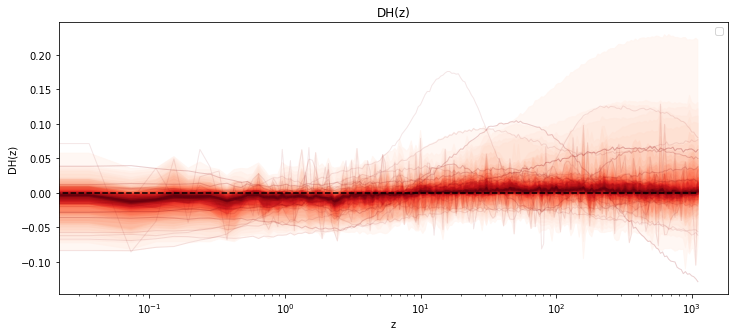

In [29]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["DH_gp"][0, :, :], z_arr[:, None])
plt.plot(z_arr, np.zeros_like(z_arr), 'k--')

# axis labels and title
plt.xscale('log')
plt.xlabel("z")
plt.ylabel("DH(z)")
plt.title("DH(z)")
plt.legend();

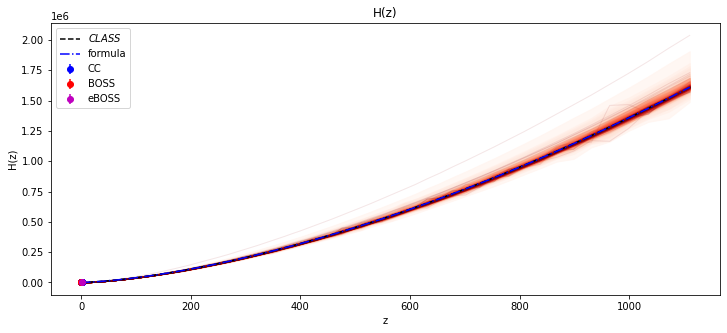

In [20]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["H_gp"][0, :, :], z_arr[:, None])
ax.plot(z_planck, Planck['Hkms_arr'], "k--", label=r'$CLASS$')

# plot the data and the true latent function
#ax.plot(z_arr_f[:, None], H_arr_f, "dodgerblue", lw=3, label=r'$LCDM$')
plt.plot(z_arr, data_class.H_arr, 'b-.', label='formula')

if 'CC' in datasets:
    plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS')
if 'DESI' in datasets:
    plt.errorbar(H_DESI['z'], H_DESI['data'], yerr = H_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
#plt.xscale('log')
plt.xlabel("z")
plt.ylabel("H(z)")
plt.title("H(z)")
plt.legend();

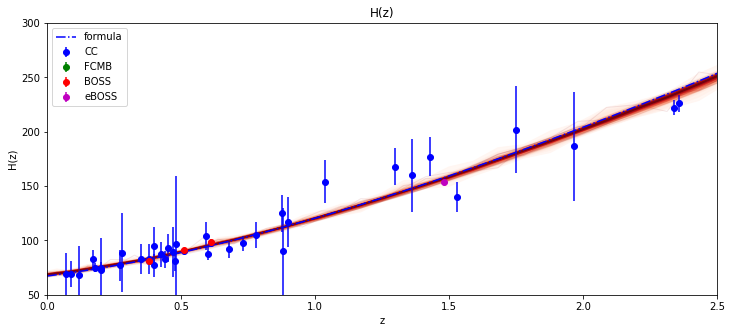

In [21]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["H_gp"][0, :, :], z_arr[:, None])
plt.plot(z_arr, data_class.H_arr, 'b-.', label='formula')

# plot the data and the true latent function
#ax.plot(z_arr_f[:, None], H_arr_f, "dodgerblue", lw=3, label=r'$LCDM$')
if 'CC' in datasets:
    plt.errorbar(CC['z'], CC['data'], yerr = CC['err'], fmt='bo', label='CC')
if 'FCMB' in datasets:
    plt.errorbar(FCMB['z'], FCMB['data'], yerr = FCMB['err'], fmt='go', label='FCMB')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['para_data'], yerr=BOSS['para_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], c/1000/(eBOSS['para_data']*eBOSS['rd']), yerr = 1/eBOSS['rd']/(np.array([0.47])), fmt='mo', label='eBOSS')
if 'DESI' in datasets:
    plt.errorbar(H_DESI['z'], H_DESI['data'], yerr = H_DESI['err'], fmt='bo', label='DESI')

# axis labels and title
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.ylabel("H(z)")
plt.title("H(z)")
plt.legend();

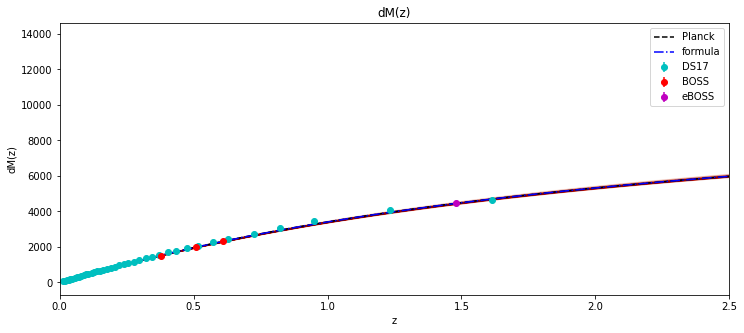

In [22]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()
# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["dM_gp"][0, :, :], z_arr[:, None])

plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.plot(z_arr, data_class.dM_arr, 'b-.', label='formula')

if 'DS17' in datasets:
    plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.49)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS')
if 'CMB' in datasets:
    plt.errorbar(CMB['z'], (1/CMB['data'])*(100*CMB['rd']), yerr=(1/CMB['err'])*1/(100*CMB['rd']), fmt='go', label='CMB')
if 'DESI' in datasets:
    plt.errorbar(dA_DESI['z'], dA_DESI['data']*(1+dA_DESI['z']), yerr = dA_DESI['err'], fmt='bo', label='DESI')
    
# axis labels and title
#plt.xscale('log')
plt.xlim(0, 2.5)
plt.xlabel("z")
plt.ylabel("dM(z)")
plt.title("dM(z)")
plt.legend();

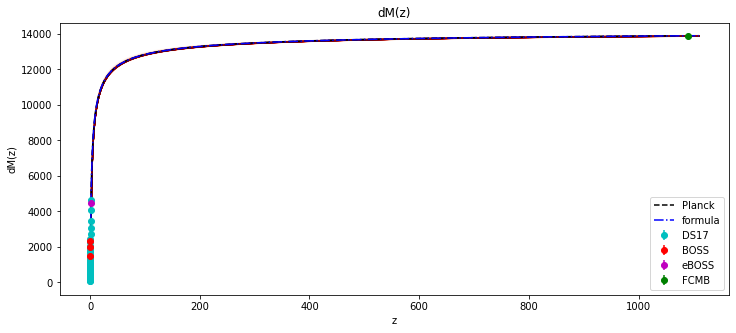

In [23]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()
# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["dM_gp"][0, :, :], z_arr[:, None])

plt.plot(z_planck, Planck['dM_arr'], "k--", label='Planck')
plt.plot(z_arr, data_class.dM_arr, 'b-.', label='formula')

if 'DS17' in datasets:
    plt.errorbar(DS17['z'], (10**((DS17['data']-25+19.49)/5))/(1+DS17['z']),
             yerr=(10**(DS17['err']/5))/(1+DS17['z']), fmt='co', label='DS17')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['perp_data'], yerr=BOSS['perp_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['perp_data']*eBOSS['rd'], yerr=np.array([0.79])*eBOSS['rd'], fmt='mo', label='eBOSS')
if 'CMB' in datasets:
    plt.errorbar(CMB['z'], (1/CMB['data'])*(100*CMB['rd']), yerr=(1/CMB['err'])*1/(100*CMB['rd']), fmt='go', label='CMB')
if 'DESI' in datasets:
    plt.errorbar(dA_DESI['z'], dA_DESI['data']*(1+dA_DESI['z']), yerr = dA_DESI['err'], fmt='bo', label='DESI')
if 'FCMB' in datasets:
    plt.errorbar(FCMB['z'], FCMB['data'], yerr=FCMB['err'], fmt='go', label='FCMB')
    
# axis labels and title
#plt.xscale('log')
plt.xlabel("z")
plt.ylabel("dM(z)")
plt.title("dM(z)")
plt.legend();

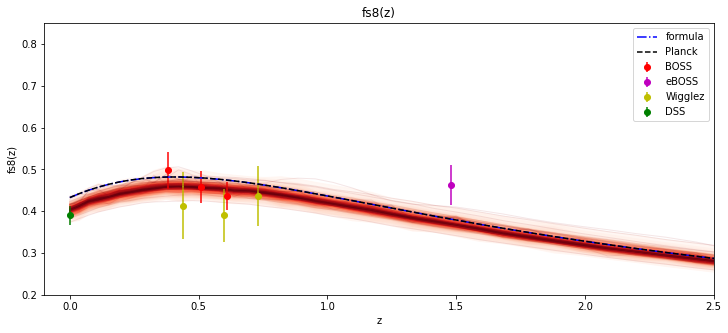

In [24]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["fs8_gp"][0, :, :],
             z_arr[:, None])
plt.plot(z_arr, data_class.fs8_arr, 'b-.', label='formula')

plt.plot(z_planck, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['fs8_data'], yerr=BOSS['fs8_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['fs8_data'], yerr=eBOSS['fs8_err'], fmt='mo', label='eBOSS')
if 'Wigglez' in datasets:
    plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez['err'], fmt='yo', label='Wigglez')
if 'DSS' in datasets:
    plt.errorbar(DSS['z'], DSS['data'], yerr=DSS['err'], fmt='go', label='DSS')
if 'DESI' in datasets:
    plt.errorbar(fs8_DESI['z'], fs8_DESI['data'], yerr = fs8_DESI['err'], fmt='bo', label='DESI')    


# axis labels and title
plt.xlim(-.1, 2.5)
plt.ylim(0.2, 0.85)
plt.xlabel("z")
plt.ylabel("fs8(z)")
plt.title("fs8(z)")
plt.legend();

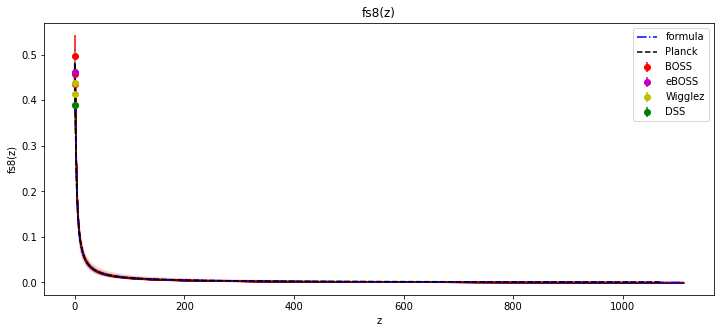

In [25]:
# plot the results
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist

plot_gp_dist(ax, trace.posterior["fs8_gp"][0, :, :],
             z_arr[:, None])

plt.plot(z_arr, data_class.fs8_arr, 'b-.', label='formula')
plt.plot(z_planck, Planck['f_arr']*Planck['s8_arr'], "k--", label='Planck')
if 'BOSS' in datasets:
    plt.errorbar(BOSS['z'], BOSS['fs8_data'], yerr=BOSS['fs8_err'], fmt='ro', label='BOSS')
if 'eBOSS' in datasets:
    plt.errorbar(eBOSS['z'], eBOSS['fs8_data'], yerr=eBOSS['fs8_err'], fmt='mo', label='eBOSS')
if 'Wigglez' in datasets:
    plt.errorbar(Wigglez['z'], Wigglez['data'], yerr=Wigglez['err'], fmt='yo', label='Wigglez')
if 'DSS' in datasets:
    plt.errorbar(DSS['z'], DSS['data'], yerr=DSS['err'], fmt='go', label='DSS')
if 'DESI' in datasets:
    plt.errorbar(fs8_DESI['z'], fs8_DESI['data'], yerr = fs8_DESI['err'], fmt='bo', label='DESI')   


# axis labels and title
plt.xlabel("z")
plt.ylabel("fs8(z)")
plt.title("fs8(z)")
plt.legend();

In [26]:
#Save
filename = data_comb
path = filename+'{}_{}_osc'.format(n_samples, n_tune)

n = np.array(trace.posterior["η"]).flatten()
l = np.array(trace.posterior["ℓ"]).flatten()
DHz = np.array(trace.posterior["DH_gp"])
DHz = DHz.reshape(-1, DHz.shape[-1])
Hz =np.array(trace.posterior["H_gp"])
Hz = Hz.reshape(-1, Hz.shape[-1])
H0 = np.array(trace.posterior["H0_gp"]).flatten()
h = H0/100
Omega_m = np.array(trace.posterior["wm0"]).flatten()/h**2
Omega_L = np.array(trace.posterior["wL0"]).flatten()/h**2


if get_dM:
    dMz = np.array(trace.posterior["dM_gp"])
    dMz = dMz.reshape(-1, dMz.shape[-1])
else:
    dMz = None

if get_rd:
    Omega_b = np.array(trace.posterior["wb0"]).flatten()/h**2
else:
    Omega_b = None
    
if get_fs8:
    s8z = np.array(trace.posterior["s8_gp"])
    s8z = s8z.reshape(-1, s8z.shape[-1])
    fs8z = np.array(trace.posterior["fs8_gp"])
    fs8z = fs8z.reshape(-1, fs8z.shape[-1])
    s80 = np.array(trace.posterior["s80"]).flatten()
    S80 = s80*np.sqrt(Omega_m/0.3)
else: 
    s8z = None 
    fs8z = None
    s80 = None
    S80 = None

if 'DS17' in datasets:
    M = np.array(trace.posterior["M"]).flatten()
else:
    M = None

os.mkdir(path)
np.savez(os.path.join(path,'samples.npz'), 
         z_arr = z_arr,
         n=n,
         l=l,
         DHz = DHz,
         Hz=Hz,
         dMz=dMz,
         s8z=s8z,
         fs8z=fs8z,
         H0=H0,
         Omega_m=Omega_m,
         Omega_b=Omega_b,
         Omega_L=Omega_L,
         s80=s80,
         S80=S80)